<a href="https://colab.research.google.com/github/MayankJha17/REGRESSION-ECOMMERCE-PROJECT/blob/main/Linear_regression_Project_E_commerce_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT NAME
---

ECOMMERCE COMPANY USING REGRESSION 

#IMPORTING LIBRARIES

---

PANDAS

NUMPY

MATPLOTLIB

SEABORN

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url='https://raw.githubusercontent.com/MayankJha17/REGRESSION-ECOMMERCE-PROJECT/main/Ecommerce%20Customer%20Linear%20Regression.csv'
dataset=pd.read_csv(url)
##printing dataset
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [93]:
##printing datatypes of features/columns and shape of dataset
print("Shape of dataset is {}\n\n".format(dataset.shape))
print("datatype of each features is \n")
dataset.dtypes
dataset.describe()

Shape of dataset is (499, 8)


datatype of each features is 



,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,499.000000,499.000000,499.000000,499.000000,499.000000
mean,33.051311,12.049910,37.060114,3.535567,499.327481
std,0.992665,0.993539,1.011476,0.999169,79.393805
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.340848,11.387694,36.346012,2.933598,445.014369
50%,33.078717,11.982045,37.067090,3.535088,499.140152
75%,33.709403,12.742144,37.716878,4.127420,549.496082
max,36.139662,15.126994,40.005182,6.922689,765.518462


##SEPERATING FEATURES 

---
1)CATEGORICAL FEATURES

2)NUMERICAL FEATURES

A)CONTINUOUS FEATURES

B)DISCRETE FEATURES


In [94]:
cat_feature=[]
num_feature=[]
for feature in dataset.columns:
  if dataset[feature].dtypes=='O':
    cat_feature.append(feature)
  else:
    num_feature.append(feature) 
print('cat_feature {}\n\n num_feature {}'.format(cat_feature,num_feature))     

cat_feature ['Email', 'Address', 'Avatar']

 num_feature ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']


##CHECKING MISSING VALUES IN THE DATASET


---



In [95]:
for feature in dataset.columns:
  print("Feature '{}' has nan values: {} ".format(feature,dataset[feature].isnull().sum()))

Feature 'Email' has nan values: 0 
Feature 'Address' has nan values: 0 
Feature 'Avatar' has nan values: 0 
Feature 'Avg. Session Length' has nan values: 0 
Feature 'Time on App' has nan values: 0 
Feature 'Time on Website' has nan values: 0 
Feature 'Length of Membership' has nan values: 0 
Feature 'Yearly Amount Spent' has nan values: 0 


###ABOVE WE CAN CONCLUDE THAT THERE IS NO MISSING VALUES



###FINDING OUTLIERS

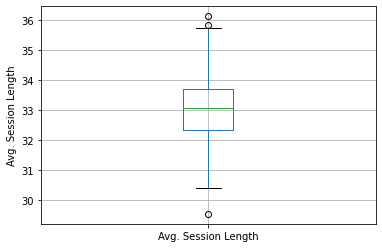

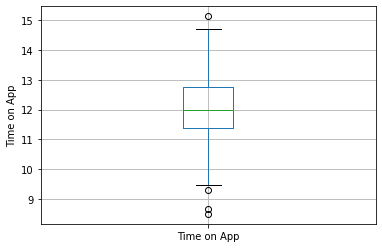

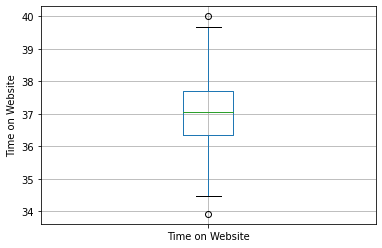

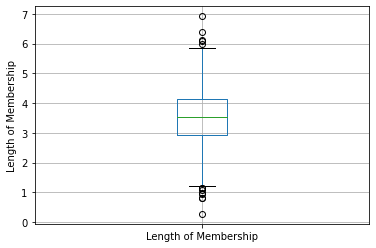

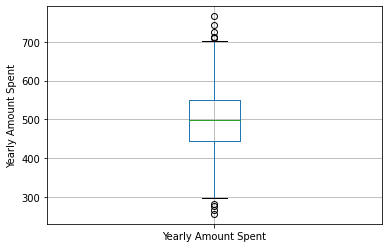

In [96]:
##PRINTING BOXPLOTS 
for feature in num_feature:
  data=dataset.copy()
  data.boxplot(column=feature)
  plt.ylabel(feature)
  plt.show()

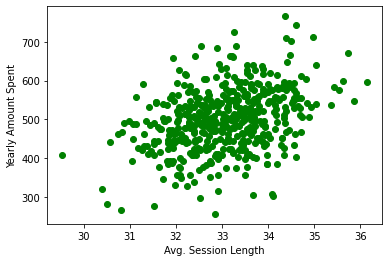

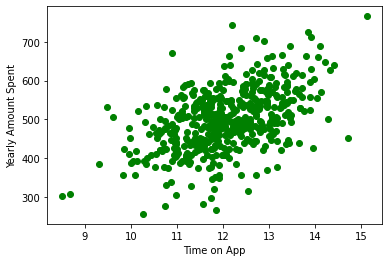

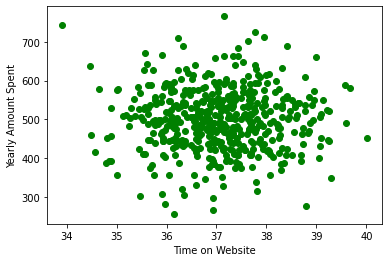

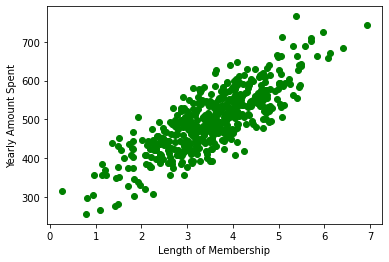

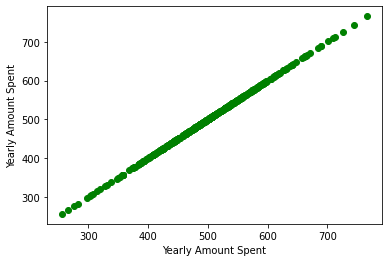

In [97]:
for feature in num_feature:
  plt.scatter(dataset[feature],dataset['Yearly Amount Spent'],color='g')
  plt.xlabel(feature)
  plt.ylabel("Yearly Amount Spent")
  plt.show()

###FROM ABOVE WE CAN SEE THAT LENGTH OF MEMBERSHIP IS SOME-WHAT LINEARLY CO-RELATED WITH EACH OTHER



##FEATURE SCALING

In [98]:
##MAKING COPY OF DATASET
from sklearn.preprocessing import StandardScaler
data=dataset[num_feature]
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [99]:
##applying feature scaling
scaler=StandardScaler()
scale_feature=scaler.fit_transform(data)

In [100]:
print(scale_feature)

[[ 1.45810259  0.61029239  2.49148868  0.54805755  1.11737317]
 [-1.13448915 -0.94751484  0.20668257 -0.87313343 -1.35060975]
 [-0.05081956 -0.72503847  0.04996073  0.57002037 -0.14852289]
 ...
 [-0.40793235 -0.55463676  1.25928795  1.42530908  0.65931014]
 [ 0.27346802  0.34407904 -0.21775026 -1.20128433 -0.54035677]
 [ 0.67025307  0.37167012 -1.27575127 -0.80187746 -0.01952789]]


In [101]:
np.array(scale_feature)

array([[ 1.45810259,  0.61029239,  2.49148868,  0.54805755,  1.11737317],
       [-1.13448915, -0.94751484,  0.20668257, -0.87313343, -1.35060975],
       [-0.05081956, -0.72503847,  0.04996073,  0.57002037, -0.14852289],
       ...,
       [-0.40793235, -0.55463676,  1.25928795,  1.42530908,  0.65931014],
       [ 0.27346802,  0.34407904, -0.21775026, -1.20128433, -0.54035677],
       [ 0.67025307,  0.37167012, -1.27575127, -0.80187746, -0.01952789]])

In [102]:
data1=pd.DataFrame(scale_feature,columns=num_feature)
data1.head()
data1.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-1.786369e-15,-7.581333e-16,1.491570e-15,-2.932413e-16,2.410675e-16
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-3.548440e+00,-3.568368e+00,-3.113692e+00,-3.271662e+00,-3.059438e+00
25%,-7.164310e-01,-6.671911e-01,-7.067087e-01,-6.030743e-01,-6.847841e-01
50%,2.763642e-02,-6.837470e-02,6.903708e-03,-4.799269e-04,-2.361857e-03
75%,6.636201e-01,6.974352e-01,6.499646e-01,5.929387e-01,6.325298e-01
max,3.114293e+00,3.100203e+00,2.914576e+00,3.393341e+00,3.356157e+00


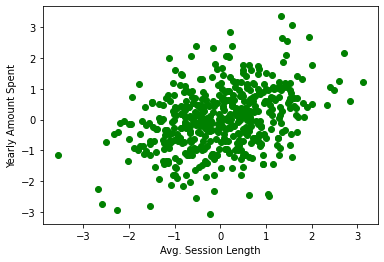

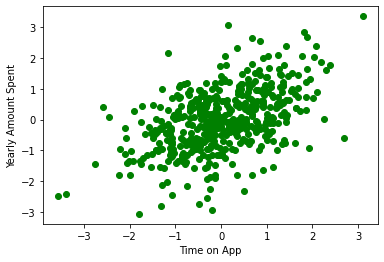

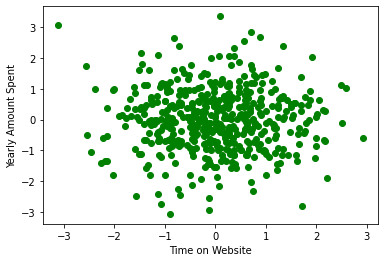

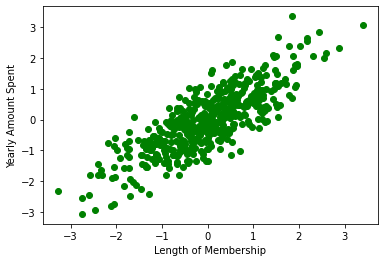

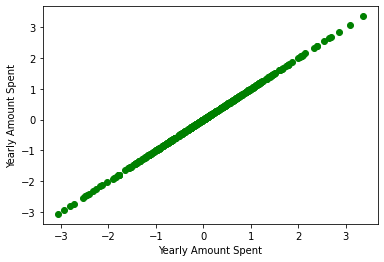

In [103]:
for feature in num_feature:
  plt.scatter(data1[feature],data1['Yearly Amount Spent'],color='g')
  plt.xlabel(feature)
  plt.ylabel("Yearly Amount Spent")
  plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0c0af1d0>,
      dtype=object)

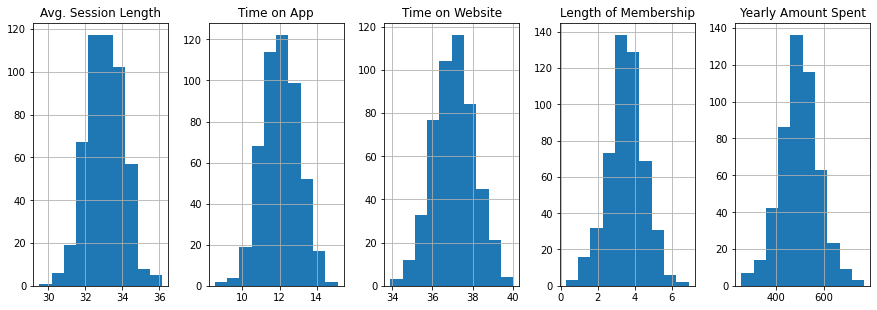

In [104]:
data.hist(figsize=(15,30),layout=(5,5))

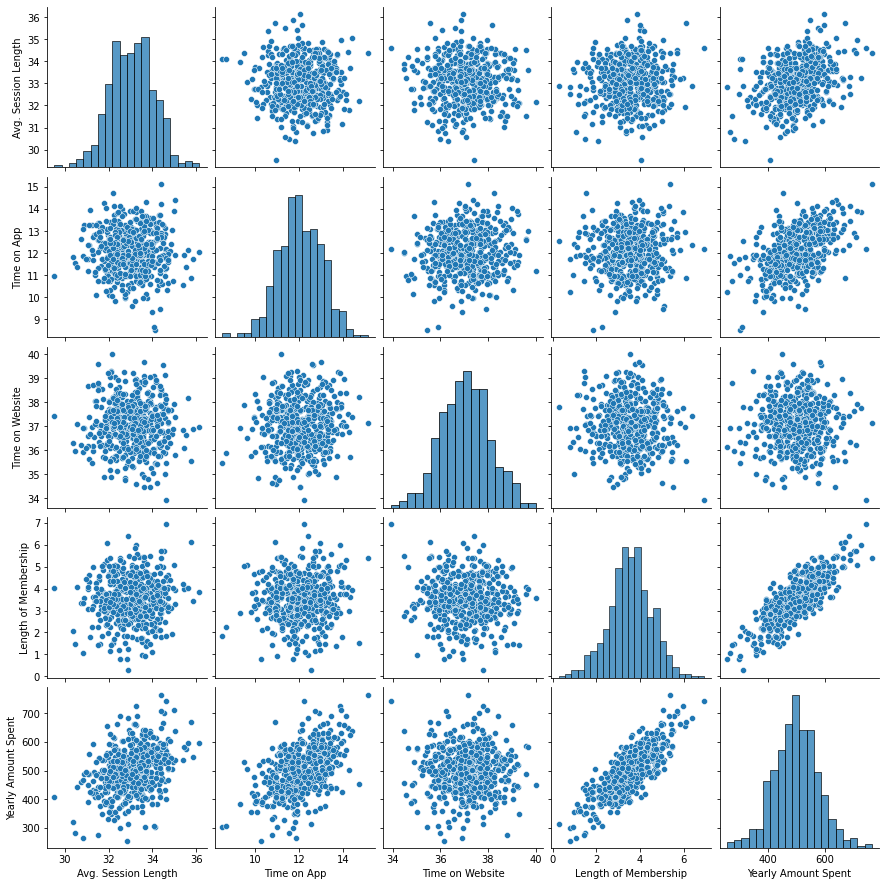

In [121]:
sns.pairplot(dataset)

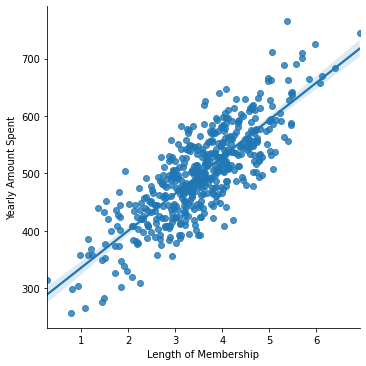

In [122]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=dataset)

##SINCE WE CAN SEE THAT THE 'LENGTH OF MEMBERSHIP' IS LINEARLY CORRELATED WITH THE 'YEARLY AMOUNT SPENT'

#BUILDING THE MODEL 

---



In [105]:
y=dataset['Yearly Amount Spent']
x=dataset[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [106]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=100)

lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
print("The Coefficients are {}".format(lm.coef_))

The Coefficients are [25.95742487 38.98909454  0.19444723 61.7184514 ]


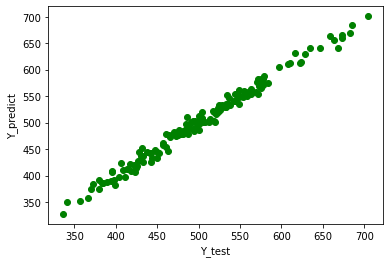

In [109]:
Y_predict=lm.predict(X_test)

plt.scatter(Y_predict,Y_test,color='g')
plt.xlabel('Y_test')
plt.ylabel("Y_predict")
plt.show()


##CALCULATING METRICS OF THE MODEL

In [110]:
from sklearn import metrics
import math
mean_absolute_error=metrics.mean_absolute_error(Y_test,Y_predict)
print("MEAN ABSOLUTE ERROR:  {}".format(mean_absolute_error))
print("ROOT SQUARED MEAN ABSOLUTE ERROR:  {}".format(math.sqrt(mean_absolute_error)))
print("R2 : {}".format(metrics.r2_score(Y_test,Y_predict)))

MEAN ABSOLUTE ERROR:  7.3562487252393085
ROOT SQUARED MEAN ABSOLUTE ERROR:  2.7122405360217057
R2 : 0.9862097179782563


##REGULARIZATION


---

##CALCULATING L1 AND L2 REGULARIZATION 


In [111]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,1e-4,1e-3,1e-2,1,10,20,30,40,45,50,55,100]}
lasso=GridSearchCV(lasso,parameters,scoring='r2',n_jobs=-1)
lasso.fit(X_train,Y_train)
print(lasso.best_params_)
print(lasso.best_score_)
  


{'alpha': 0.01}
0.9825006640193585


In [112]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,1e-4,1e-3,1e-2,1,10,20,30,40,45,50,55,100]}
ridge=GridSearchCV(ridge,parameters,scoring='r2',n_jobs=-1)
ridge.fit(X_train,Y_train)
print(ridge.best_params_)
print(ridge.best_score_)

{'alpha': 0.01}
0.9824986434507051


###FROM ABOVE WE CAN SEE THAT THE SORE OF ABOVE THREE MODELS

LINEAR RGRESSION

LASSO REGRESSION

RIDGE REGRESSION

HAVE ALMOST APPROX SAME ACCUARACY OF THE MODEL PREDICT


##APPLYING K-FOLD CROSS VALIDATION IN THREE DIFFERENT MODELS



In [113]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,x,y,cv=3)##linear regression k_fold
score

array([0.9821452 , 0.98687957, 0.98232709])

In [114]:
score.mean()##mean of linear regression k_fold

0.9837839527553361

In [117]:
##lasso 

lasso=Lasso(alpha=0.01)
score=cross_val_score(lasso,x,y,cv=3)
score
score.mean()

0.9837833560138299

In [120]:
ridge=Ridge(alpha=0.01)
score=cross_val_score(ridge,x,y,cv=3)
print(score)
score.mean()

[0.98214629 0.98687978 0.98232574]


0.9837839369044058

##CONSIDERING BEST ACCURACY 
LINEAR REGRESSION

we will finaize the model

In [138]:
##printing coefficient of linear model
coefficient=list(lm.coef_)
x=list(x.columns)

In [141]:
i=0
for feature in x:
  print("THE COEFFICIENT OF {} IS {} ".format(feature,coefficient[i]))
  i=i+1

THE COEFFICIENT OF Avg. Session Length IS 25.957424873068007 
THE COEFFICIENT OF Time on App IS 38.98909454304525 
THE COEFFICIENT OF Time on Website IS 0.19444723093809946 
THE COEFFICIENT OF Length of Membership IS 61.71845140088073 


##FROM ABOVE WE CAN SEE THAT THE  COEFFICIENT OF  TIME ON APP IS MUCH GREATER THAN THE COEFFICIENT OF TIME ON WEBSITE

---

####SPENDING/DEVELOPING  MONEY ON APP IS USEFUL AND PROFITABLE  THAN ON THE WEBSITE